# chapter 3. Data Type

## 1. datetime - 기본 날짜와 시간 형

### 날짜와 시간은 파이썬에서 기본으로 제공하는 자료형에 포함되어 있지 않지만, 데이터 분석에 있어 빠질 수 없는 중요한 자료형입니다. 날짜와 시간에 관련된 기능을 제공하는 패키지는 다음과 같습니다.

 ### 👆from 과 import 의 차이는 무엇일까?

#### - import만 사용하면 모듈안의 함수를 사용할 때에 모듈명.함수명( ) 형태로 사용하고, from 을 사용하면 바로 함수명( ) 이렇게만 사용이 가능하다.

#### - import os &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ⇒ 함수 사용시 os.listdir( )라고 입력해야함.  
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (listdir() : 현재 디렉토리에 있는 모든 파일(디렉토리) 리스트를 가져오는 함수)

#### - from os import *&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;⇒ os 모듈 내의 모든 메소드 사용 가능. 와일드 임포트라고 부름.

#### - from os import listdir &nbsp;&nbsp; ⇒ 함수를 단 한개 가져올 때 사용한다.

#### - from openyxl import Workbook  
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;wb = Workbook( ) &nbsp;&nbsp;⇒ Workbook 클래스로 wb라는 인스턴스 생성

#### - 이처럼 모듈 안에는 함수 뿐 아니라, 변수나 클래스도 존재하고 이걸 import로 가져다 사용함.

### (1 ) datetime 클래스

### 이 클래스의 객체는 년월일 정보를 담고 있는 객체 입니다.

In [8]:
from datetime import date
#오늘 날짜 불러오기
today = date.today()       #2021-07-01 형식
print(today)
print(today.weekday())     # 0(월) ~ 6(일)
print('--------------------------------')
print(today.year)          # 년, 월, 일 따로 추출 가능 -> 반환값은 int 타입
print(today.month)
print(today.day)
print('--------------------------------')

# 현재 날짜, 시간 불러오기
from datetime import datetime   # datetime.datetime 함수
now = datetime.now()             # 2021-07-01  09:02:51 .023939 형식
print(now)
print('--------------------------------')

2021-07-12
0
--------------------------------
2021
7
12
--------------------------------
2021-07-12 00:22:24.247049
--------------------------------


### * strftime( ) 사용하여 원하는 형식으로 불러오기 (%Y, Ym, %d, %H, %M, %s)
#### 📍 다향한 형태의 포맷의 문자열 변환을 가능하게 해주며, String 형으로 반환됩니다.

In [10]:
result = now.strftime('%Y  %m  %d')   # 20210701
print(result)

2021  07  12


### * strptime( ) 사용하여 특정 포멧의 문자열을 time_struct 타입으로 변환하기
#### 📍 strftime() 함수와 정반대로 특정 포멧의 문자열을 time_struct 타입으로 변환을 해줍니다.

In [16]:
import time

tm = time.gmtime(1626018201.188874)
print(tm)

time.struct_time(tm_year=2021, tm_mon=7, tm_mday=11, tm_hour=15, tm_min=43, tm_sec=21, tm_wday=6, tm_yday=192, tm_isdst=0)


 ### 👆time_struct 클래스는 무엇일까?

In [15]:
import time

secs = time.time()
print(secs)

1626018201.188874


<b> 📍 timestamp의 값인 '1626017846.2489069'의 값을 보고 우리는 무슨 날짜와 시간을 나타내는지 쉽게 알아보기가 힘듭니다.</b>  
<b> 따라서, time 모듈은 timestamp가 주어졌을 때, 날짜와 시간을 알아내기 위한 API를 제공하는데,</b>  
<b> 이 때, 내부적으로 날짜와 시간을 알아내기 위한 9개의 속성을 갖는 time_struct 클래스를 사용합니다.

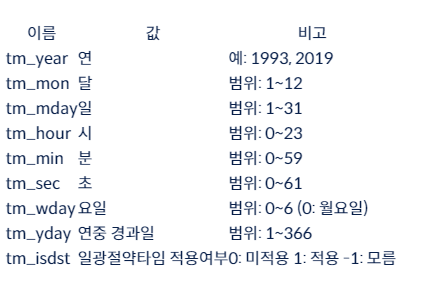

### * string을 date 객체로 변환하기
#### 📍 주의점은 문자열 입력 시 '20201-07-02' 형태만 가능하고, '2021-7-2' 와 같은 형식은 처리가 안됨

In [9]:
type(today.fromisoformat('2021-07-02'))

datetime.date

### ( 2 ) dateutil 패키지

### 사용자가 문자열에 맞는 형식 문자열을 제공하지 않아도 parse 함수를 사용하여 자동으로 형식 문자열을 찾아 datetime 클래스 객체로 만들어주는 것이 특징

In [2]:
from dateutil.parser import parse
date = parse('2021-07-01')
print(date)

print('-----------------------')

date = parse("Jul 16, 2020 04:05:32 PM")
print(date)

print('-----------------------')

date = parse('7/2/2021')
print(date)

2021-07-01 00:00:00
-----------------------
2020-07-16 16:05:32
-----------------------
2021-07-02 00:00:00


### ( 3 ) timedelta 클래스

### 날짜나 시간의 간격을 구하고자 할 때는 두 개의 datetime 클래스 객체의 차이를 구합니다.  
<b>(이 결과는 timedelta 클래스 객체로 반환)</b>

In [6]:
import datetime
today = datetime.date.today()
print(today)

print('----------------------')

diff_days = datetime.timedelta(days=50) # 50일 후의 날짜를 구하겠다
print(today + diff_days)                # 마찬가지로 50일 전의 날짜면 today - diff_days 사용

2021-07-12
----------------------
2021-08-31


### timedelta의 단점은 날짜와 초 단위로만 연산을 할 수 있다는 점이다. 이를 보완하기 위해 dateutil 패키지를 사용하는데 이는 월 단위의 계산을 지원하는 relativedelta 클래스를 제공한다.
### 사용 예시 )

In [20]:
from dateutil.relativedelta import relativedelta
print(today + relativedelta(months=2))       # 2달 후를 계산.

2021-09-02


### ( 4 ) time 패키지

<b> time 패키지는 실행을 잠시 멈추는 sleep 함수를 제공한다. sleep 함수에 n이라는 숫자를 인수로 주면 n초만큼 쉬었다가 다음 코드를 실행한다.</b>

In [23]:
import time

print(1)

time.sleep(2)

print(2)

time.sleep(2)

print(3)

1
2
3





## 2. calender - 일반 달력 관련 함수

#### 📍 calender 함수에 인자로 출력을 원하는 연도를 넘겨준다. 넘겨받은 연도의 달력을 반환해준다.
#### 📍 함수의 호출만으로는 보이지 않고, 반환받은 값은 print를 해주어야한다. 

In [5]:
import calendar
cal = calendar.calendar(2021)
print(cal)

                                  2021

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
             1  2  3       1  2  3  4  5  6  7       1  2  3  4  5  6  7
 4  5  6  7  8  9 10       8  9 10 11 12 13 14       8  9 10 11 12 13 14
11 12 13 14 15 16 17      15 16 17 18 19 20 21      15 16 17 18 19 20 21
18 19 20 21 22 23 24      22 23 24 25 26 27 28      22 23 24 25 26 27 28
25 26 27 28 29 30 31                                29 30 31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
          1  2  3  4                      1  2          1  2  3  4  5  6
 5  6  7  8  9 10 11       3  4  5  6  7  8  9       7  8  9 10 11 12 13
12 13 14 15 16 17 18      10 11 12 13 14 15 16      14 15 16 17 18 19 20
19 20 21 22 23 24 25      17 18 19 20 21 22 23      21 22 23 24 25 26 27
26 27 28 29 30            24 25 26 27 

### * prmonth : 특정 연도의 월에 대한 달력을 보여준다.

In [8]:
import calendar
calendar.prmonth(2021, 7)

     July 2021
Mo Tu We Th Fr Sa Su
          1  2  3  4
 5  6  7  8  9 10 11
12 13 14 15 16 17 18
19 20 21 22 23 24 25
26 27 28 29 30 31


### * weekday : 특정 년월일을 인자로 받아 그 날짜에 해당하는 요일 정보를 리턴한다. 
#### 요일 정보는 월요일부터 0, 화요일 1, ... 일요일 6이다.

In [12]:
import calendar
weekday = calendar.weekday(2021,7, 3)
print(weekday)

5


### * monthrange : 연도와 월을 넘겨받아 그 달의 1일이 무슨 요일인지와 그 달이 몇일까지 있는지를 튜플 형태로 반환한다.

In [14]:
import calendar
monmon = calendar.monthrange(2021, 1)
print(monmon)

(4, 31)


####  📍 금요일이니까 4가 나오고, 1월은 31일까지 있으니까 (4, 31)이 출력됨을 볼 수 있다.

  
 --- 
  
## 3. pprint  - 예쁜 프린터 인쇄기
### * pretty print를 의미하며 데이터를 예쁘고 보기 좋게 출력해주는 모듈 입니다.
### * 복잡한 구조를 지닌 json 형태의 데이터들을 디버깅 용도로 출력할때 자주 사용합니다.

In [21]:
my_dic = [{'job': '청소원', 'company': '주식회사 고', 'ssn': '780820-1284721', 'residence': '강원도 성남시 삼성가 (은정이동)', 'blood_group': 'B-', 'username': 'hyeonsugmun', 'name': '오정남', 'sex': 'M', 'address': '광주광역시 관악 구 역삼283길 (은경노이리)', 'mail': 'ci@daum.net'}, {'job': '패션 디자이너', 'company': '(유) 곽', 'ssn': '790726-2477976', 'residence': '서울특별시 강남구 테헤란로 (우진김김동)', 'blood_group': 'B+', 'username': 'jangyeongceol', 'name': '이지훈', 'sex': 'M', 'address': '강원도 안산시 상록구 언주길 (수민김김읍)', 'mail': 'sanghun69@nate.com'}, {'job': '미용사', 'company': '최박', 'ssn': '040125-1449947', 'residence': '인천광역시 관악구 백제고분길 (성 호백김리)', 'blood_group': 'AB+', 'username': 'hyeonjeonghan', 'name': '이춘자', 'sex': 'F', 'address': '충청북도 양주시 반포대4길', 'mail': 'kgweon@hanmail.net'}]
print(my_dic)

[{'job': '청소원', 'company': '주식회사 고', 'ssn': '780820-1284721', 'residence': '강원도 성남시 삼성가 (은정이동)', 'blood_group': 'B-', 'username': 'hyeonsugmun', 'name': '오정남', 'sex': 'M', 'address': '광주광역시 관악 구 역삼283길 (은경노이리)', 'mail': 'ci@daum.net'}, {'job': '패션 디자이너', 'company': '(유) 곽', 'ssn': '790726-2477976', 'residence': '서울특별시 강남구 테헤란로 (우진김김동)', 'blood_group': 'B+', 'username': 'jangyeongceol', 'name': '이지훈', 'sex': 'M', 'address': '강원도 안산시 상록구 언주길 (수민김김읍)', 'mail': 'sanghun69@nate.com'}, {'job': '미용사', 'company': '최박', 'ssn': '040125-1449947', 'residence': '인천광역시 관악구 백제고분길 (성 호백김리)', 'blood_group': 'AB+', 'username': 'hyeonjeonghan', 'name': '이춘자', 'sex': 'F', 'address': '충청북도 양주시 반포대4길', 'mail': 'kgweon@hanmail.net'}]


In [24]:
from pprint import pprint
my_dic = [{'job': '청소원', 'company': '주식회사 고', 'ssn': '780820-1284721', 'residence': '강원도 성남시 삼성가 (은정이동)', 'blood_group': 'B-', 'username': 'hyeonsugmun', 'name': '오정남', 'sex': 'M', 'address': '광주광역시 관악 구 역삼283길 (은경노이리)', 'mail': 'ci@daum.net'}, {'job': '패션 디자이너', 'company': '(유) 곽', 'ssn': '790726-2477976', 'residence': '서울특별시 강남구 테헤란로 (우진김김동)', 'blood_group': 'B+', 'username': 'jangyeongceol', 'name': '이지훈', 'sex': 'M', 'address': '강원도 안산시 상록구 언주길 (수민김김읍)', 'mail': 'sanghun69@nate.com'}, {'job': '미용사', 'company': '최박', 'ssn': '040125-1449947', 'residence': '인천광역시 관악구 백제고분길 (성 호백김리)', 'blood_group': 'AB+', 'username': 'hyeonjeonghan', 'name': '이춘자', 'sex': 'F', 'address': '충청북도 양주시 반포대4길', 'mail': 'kgweon@hanmail.net'}]
pprint(my_dic)

[{'address': '광주광역시 관악 구 역삼283길 (은경노이리)',
  'blood_group': 'B-',
  'company': '주식회사 고',
  'job': '청소원',
  'mail': 'ci@daum.net',
  'name': '오정남',
  'residence': '강원도 성남시 삼성가 (은정이동)',
  'sex': 'M',
  'ssn': '780820-1284721',
  'username': 'hyeonsugmun'},
 {'address': '강원도 안산시 상록구 언주길 (수민김김읍)',
  'blood_group': 'B+',
  'company': '(유) 곽',
  'job': '패션 디자이너',
  'mail': 'sanghun69@nate.com',
  'name': '이지훈',
  'residence': '서울특별시 강남구 테헤란로 (우진김김동)',
  'sex': 'M',
  'ssn': '790726-2477976',
  'username': 'jangyeongceol'},
 {'address': '충청북도 양주시 반포대4길',
  'blood_group': 'AB+',
  'company': '최박',
  'job': '미용사',
  'mail': 'kgweon@hanmail.net',
  'name': '이춘자',
  'residence': '인천광역시 관악구 백제고분길 (성 호백김리)',
  'sex': 'F',
  'ssn': '040125-1449947',
  'username': 'hyeonjeonghan'}]
